  ## <a id='4'> Stock Trading Facilitation Service For Profiting Customers</a> 

![](https://g.foolcdn.com/editorial/images/487547/getty-stock-market-success.jpg)

**Here we will be analysing a binary classification problem.**

A financial institution is planning to roll out a stock market trading facilitation service for their
existing account holders. This service costs significant amount of money for the bank in terms of
infra, licensing and people cost. To make the service offering profitable, they charge a percentage
base commission on every trade transaction. However this is not a unique service offered by
them, many of their other competitors are offering the same service and at lesser commission
some times. To retain or attract people who trade heavily on stock market and in turn generate a
good commission for institution, they are planning to offer discounts as they roll out the service
to entire customer base.

Problem is , that this discount, hampers profits coming from the customers who do not trade in
large quantities . To tackle this issue , company wants to offer discounts selectively. To be able to
do so, they need to know which of their customers are going to be heavy traders or money
makers for them.

To be able to do this, they decided to do a beta run of their service to a small chunk of their
customer base [approx 10000 people]. For these customers they have manually divided them
into two revenue categories 1 and 2. Revenue one category is the one which are money makers
for the bank, revenue category 2 are the ones which need to be kept out of discount offers.
We need to use this study's data to build a prediction model which should be able to identify if a
customer is potentially eligible for discounts [falls In revenue grid category 1]. Lets get the data
and begin.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 
sns.set()


## <a id='4'>1. Visualising Data</a> 

In [2]:
train_file = 'F:/ML-Problems/Predicting_Revenue_Class_of_Customer/data/rg_train.csv'
test_file = 'F:/ML-Problems/Predicting_Revenue_Class_of_Customer/data/rg_test.csv'

In [3]:
bd_train = pd.read_csv(train_file)
bd_test = pd.read_csv(test_file)

Revenue.Grid is our output variable

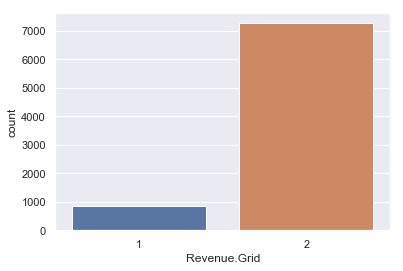

In [4]:
sns.countplot(x = 'Revenue.Grid', data=bd_train)

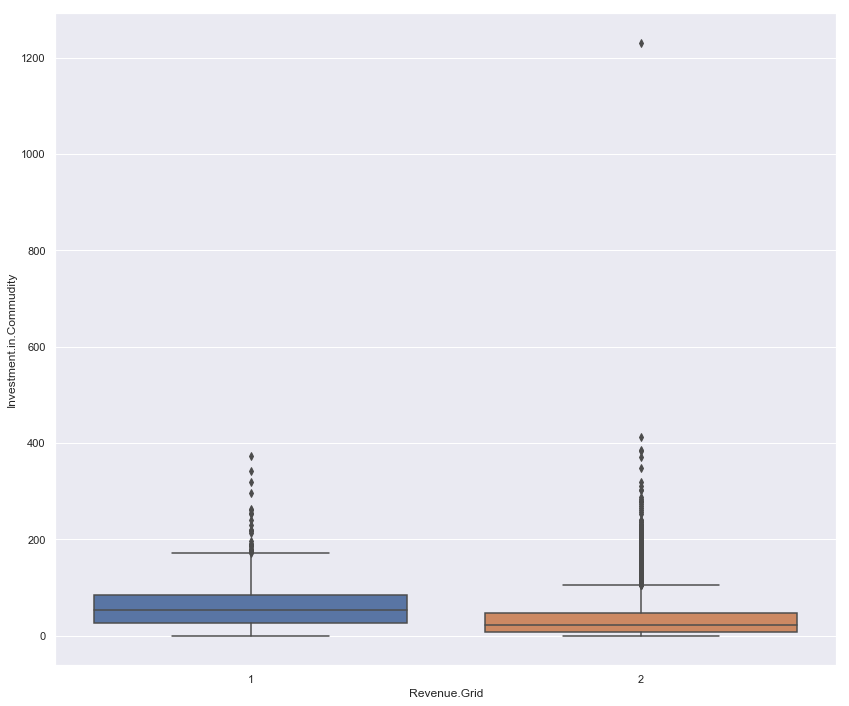

In [5]:
sns.boxplot(x='Revenue.Grid', y='Investment.in.Commudity', data=bd_train)
fig=plt.gcf()
fig.set_size_inches(14,12)

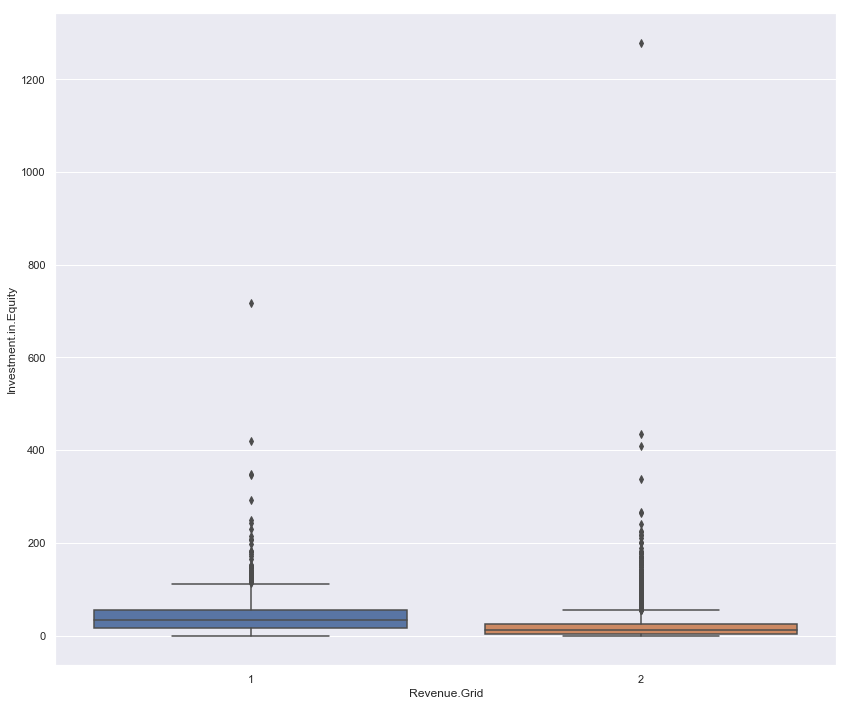

In [6]:
sns.boxplot(x='Revenue.Grid', y='Investment.in.Equity', data=bd_train)
fig=plt.gcf()
fig.set_size_inches(14,12)

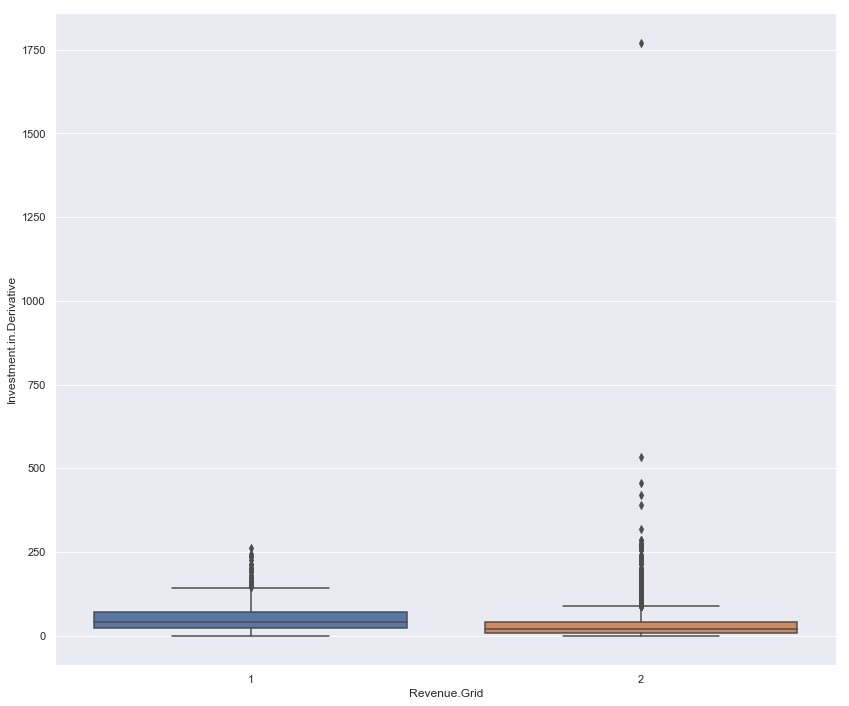

In [7]:
sns.boxplot(x='Revenue.Grid', y='Investment.in.Derivative', data=bd_train)
fig=plt.gcf()
fig.set_size_inches(14,12)

In above cases we see outliers, then we cannot use mean to replace NA/Missing values for these variables

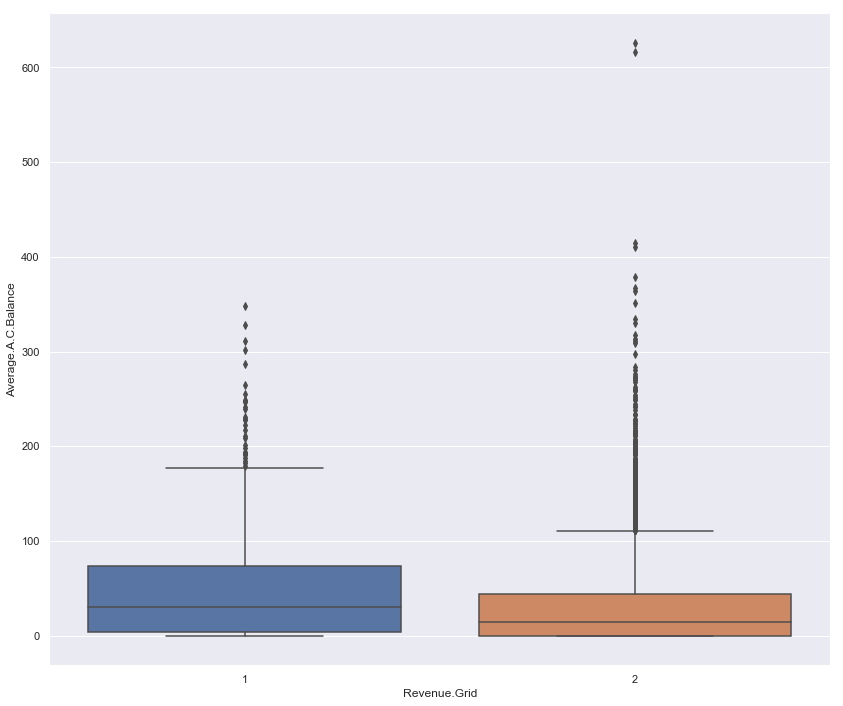

In [8]:
sns.boxplot(x='Revenue.Grid', y='Average.A.C.Balance', data=bd_train)
fig=plt.gcf()
fig.set_size_inches(14,12)

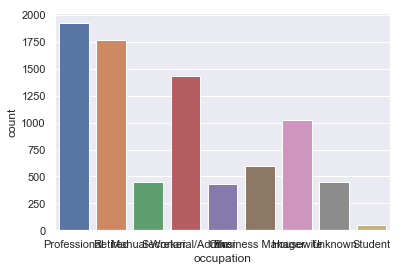

In [9]:
sns.countplot(bd_train['occupation'])

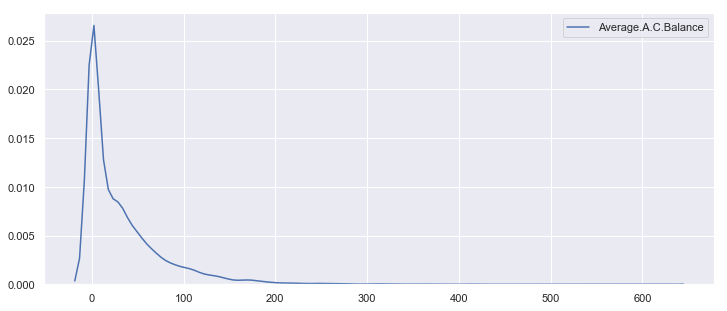

In [10]:
plt.figure(figsize=(12,5))
p = sns.kdeplot(bd_train['Average.A.C.Balance'])


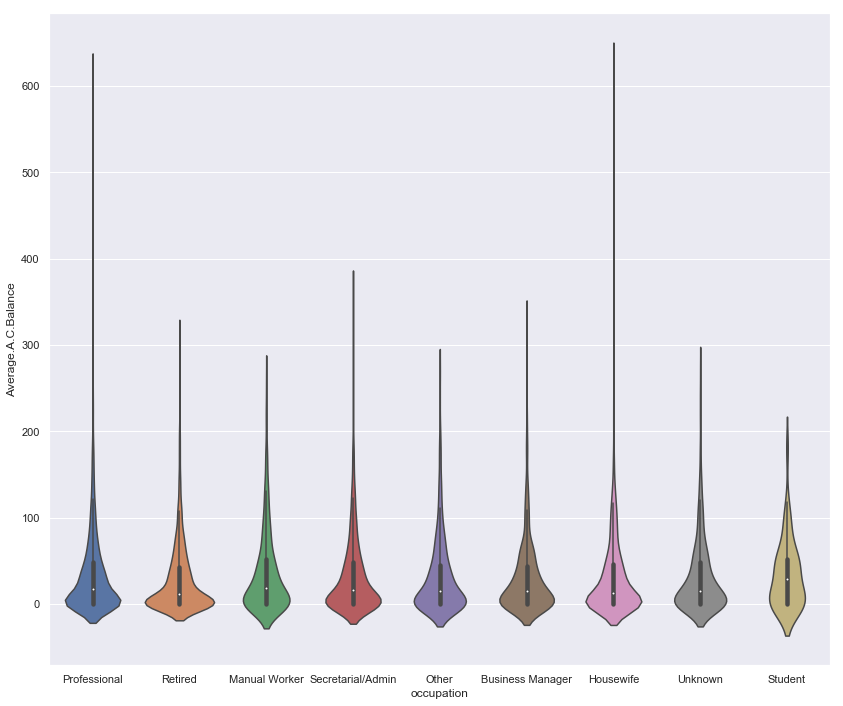

In [11]:

sns.violinplot(x='occupation', y='Average.A.C.Balance', data=bd_train)
fig=plt.gcf()
fig.set_size_inches(14,12)

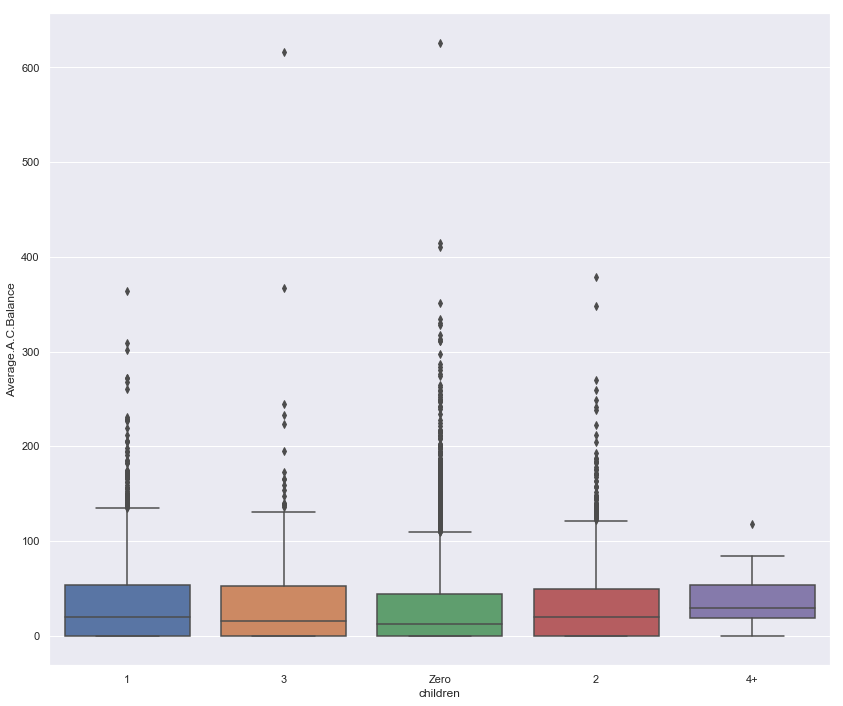

In [12]:
sns.boxplot(x='children', y='Average.A.C.Balance', data=bd_train)
fig=plt.gcf()
fig.set_size_inches(14,12)

Here we see higher average account balance for those persons with highest childrens

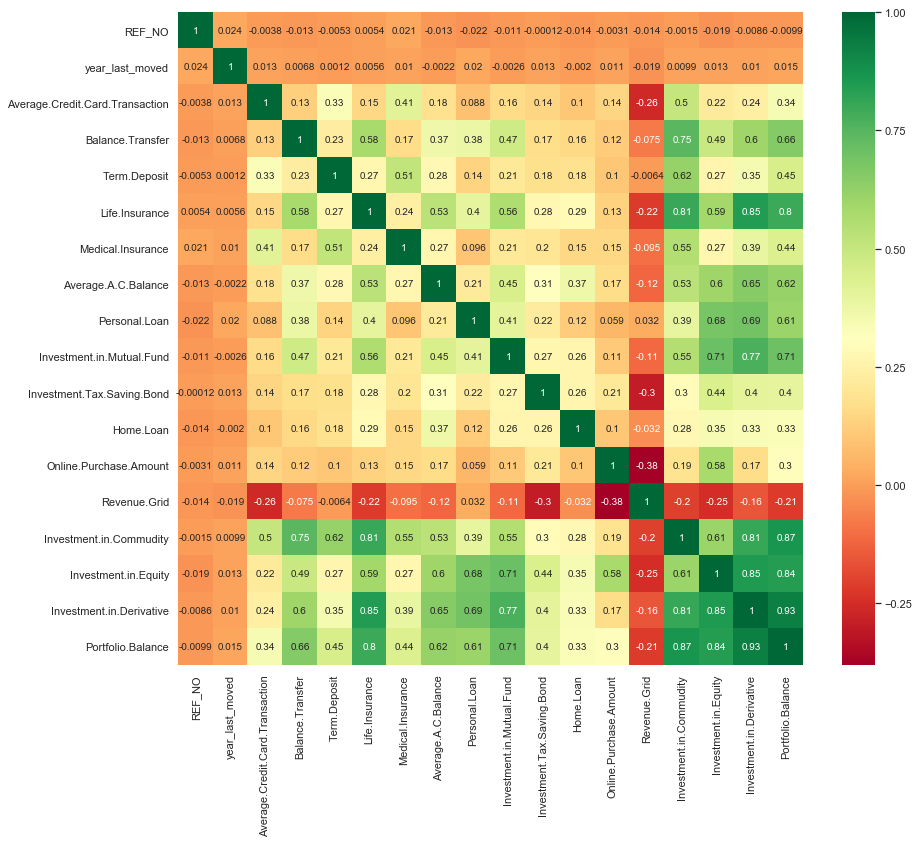

In [13]:
sns.heatmap(bd_train[bd_train.columns[:]].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(14,12)
plt.show()

From the two variable highly correlated, here we drop the one which is less correlated with Revenue.Grid(outcome) 

* Lets add Revenue.Grid to test data and combine both test and train data for data preprocessing

In [14]:
bd_test['Revenue.Grid'] = np.nan
bd_train['data'] = 'train'
bd_test['data'] = 'test'

In [15]:
bd_test=bd_test[bd_train.columns] #to ensure same order of columns

* **Concatenating train and test data**

In [16]:
bd_all = pd.concat([bd_train, bd_test], axis = 0)

Take a look at the data

In [17]:
bd_test.shape, bd_train.shape

((2031, 33), (8124, 33))

In [18]:
bd_all.isnull().sum()

REF_NO                                0
children                              0
age_band                              0
status                                0
occupation                            0
occupation_partner                    0
home_status                           0
family_income                         0
self_employed                         0
self_employed_partner                 0
year_last_moved                       0
TVarea                                0
post_code                             0
post_area                             0
Average.Credit.Card.Transaction       0
Balance.Transfer                      0
Term.Deposit                          0
Life.Insurance                        0
Medical.Insurance                     0
Average.A.C.Balance                   0
Personal.Loan                         0
Investment.in.Mutual.Fund             0
Investment.Tax.Saving.Bond            0
Home.Loan                             0
Online.Purchase.Amount                0


There are no missing values in this dataset

In [19]:
bd_all.head()

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,...,Home.Loan,Online.Purchase.Amount,Revenue.Grid,gender,region,Investment.in.Commudity,Investment.in.Equity,Investment.in.Derivative,Portfolio.Balance,data
0,2148,1,45-50,Partner,Professional,Professional,Rent Privately,">=35,000",Yes,Yes,...,2.48,0.0,2.0,Female,South West,65.87,9.27,30.93,87.48,train
1,8099,1,61-65,Partner,Retired,Retired,Own Home,"<12,500, >=10,000",No,No,...,3.99,0.0,2.0,Female,Unknown,42.46,4.49,26.23,110.73,train
2,6611,3,31-35,Partner,Professional,Professional,Own Home,">=35,000",No,No,...,0.00,0.0,2.0,Male,East Anglia,75.38,0.00,26.66,127.57,train
3,1950,Zero,55-60,Partner,Professional,Professional,Own Home,">=35,000",No,No,...,0.00,0.0,2.0,Female,North West,34.78,6.91,29.24,33.79,train
4,10857,2,51-55,Partner,Manual Worker,Manual Worker,Own Home,"<27,500, >=25,000",Yes,Yes,...,0.00,0.0,2.0,Female,South West,48.58,9.58,20.65,56.17,train


In [20]:
bd_all.dtypes

REF_NO                               int64
children                            object
age_band                            object
status                              object
occupation                          object
occupation_partner                  object
home_status                         object
family_income                       object
self_employed                       object
self_employed_partner               object
year_last_moved                      int64
TVarea                              object
post_code                           object
post_area                           object
Average.Credit.Card.Transaction    float64
Balance.Transfer                   float64
Term.Deposit                       float64
Life.Insurance                     float64
Medical.Insurance                  float64
Average.A.C.Balance                float64
Personal.Loan                      float64
Investment.in.Mutual.Fund          float64
Investment.Tax.Saving.Bond         float64
Home.Loan  

In [21]:
bd_all.nunique()

REF_NO                             10155
children                               5
age_band                              13
status                                 5
occupation                             9
occupation_partner                     9
home_status                            5
family_income                         13
self_employed                          2
self_employed_partner                  2
year_last_moved                       95
TVarea                                14
post_code                          10040
post_area                           2039
Average.Credit.Card.Transaction     1411
Balance.Transfer                    2183
Term.Deposit                        1419
Life.Insurance                      3111
Medical.Insurance                   1589
Average.A.C.Balance                 2223
Personal.Loan                       1760
Investment.in.Mutual.Fund           2470
Investment.Tax.Saving.Bond           832
Home.Loan                            884
Online.Purchase.

## <a id='2'>2. Data cleaning</a> 

* **From above data overview we can conclude following**

1. **REF_NO,post_code , post_area : drop (too many unique values)**
2. **children : Zero : 0 , 4+ : 4 and then convert to numeric**
3. **age_band, family income : string processing and then to numeric**
4. **status , occupation , occupation_partner , home_status,self_employed,** 
   **TVArea , Region , gender : create dummies**
5. **Revenue Grid : 1,2 : 1,0 (some functions need the target to be 1/0 in 
   binary classification).**


In [22]:
bd_all.drop(['REF_NO','post_code','post_area'],axis=1,inplace=True)

In [23]:
bd_all['children']=np.where(bd_all['children']=='Zero',0,bd_all['children'])
bd_all['children']=np.where(bd_all['children'].str[:1]=='4',4,bd_all['children'])
bd_all['children']=pd.to_numeric(bd_all['children'],errors='coerce')

In [24]:
bd_all['Revenue.Grid']=(bd_all['Revenue.Grid']==1).astype(int)

In [25]:
bd_all['family_income'].value_counts(dropna=False)

>=35,000             2517
<27,500, >=25,000    1227
<30,000, >=27,500     994
<25,000, >=22,500     833
<20,000, >=17,500     683
<12,500, >=10,000     677
<17,500, >=15,000     634
<15,000, >=12,500     629
<22,500, >=20,000     590
<10,000, >= 8,000     563
< 8,000, >= 4,000     402
< 4,000               278
Unknown               128
Name: family_income, dtype: int64

In [26]:
bd_all['family_income']=bd_all['family_income'].str.replace(',',"")
bd_all['family_income']=bd_all['family_income'].str.replace('<',"")
k=bd_all['family_income'].str.split('>=',expand=True)

In [27]:
for col in k.columns:
    k[col]=pd.to_numeric(k[col],errors='coerce')

In [28]:
bd_all['fi']=np.where(bd_all['family_income']=='Unknown',np.nan,
    np.where(k[0].isnull(),k[1],
    np.where(k[1].isnull(),k[0],0.5*(k[0]+k[1]))))

In [29]:
bd_all['age_band'].value_counts(dropna=False)

45-50      1359
36-40      1134
41-45      1112
31-35      1061
51-55      1052
55-60      1047
26-30       927
61-65       881
65-70       598
22-25       456
71+         410
18-21        63
Unknown      55
Name: age_band, dtype: int64

In [30]:
k=bd_all['age_band'].str.split('-',expand=True)
for col in k.columns:
    k[col]=pd.to_numeric(k[col],errors='coerce')

In [31]:
bd_all['ab']=np.where(bd_all['age_band'].str[:2]=='71',71,
             np.where(bd_all['age_band']=='Unknow',np.nan,0.5*(k[0]+k[1])))

In [32]:
del bd_all['age_band']
del bd_all['family_income']

In [33]:
cat_vars=bd_all.select_dtypes(['object']).columns
cat_vars=list(cat_vars)
cat_vars.remove('data')

we are using pd.get_dummies here to create dummies
its more straight forward but doesnt let you ignore categories on the
basis of frequencies

In [34]:
for col in cat_vars:
    dummy=pd.get_dummies(bd_all[col],drop_first=True,prefix=col)
    bd_all=pd.concat([bd_all,dummy],axis=1)
    del bd_all[col]
    print(col)
del dummy

status
occupation
occupation_partner
home_status
self_employed
self_employed_partner
TVarea
gender
region


imputing missing values

In [35]:
for col in bd_all.columns:
    if col=='data' or bd_all[col].isnull().sum()==0:
        continue
    bd_all.loc[bd_all[col].isnull(),col]=bd_all.loc[bd_all['data']=='train',col].mean()

In [36]:
bd_all.loc[bd_all[col].isnull(),col]=bd_all.loc[bd_all['data']=='train',col].mean()

* **Separating data**

In [37]:
train1=bd_all[bd_all['data']=='train']
del train1['data']
test1=bd_all[bd_all['data']=='test']
test1.drop(['Revenue.Grid','data'],axis=1,inplace=True)

## <a id='3'>3. Model building</a> 

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
params={'class_weight':['balanced',None],
        'penalty':['l1','l2'],
# these are L1 and L2 written in lower case
# dont confuse them with numeric eleven and tweleve
        'C':np.linspace(0.0001,1000,10)}

# we can certainly try much higher ranges and number of values for theparameter 'C'
# grid search in this case , will be trying out 2*2*10=40 possiblecombination
# and will give us cross validated performance for all

In [40]:
model=LogisticRegression(fit_intercept=True)

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
grid_search=GridSearchCV(model,param_grid=params,cv=10,scoring="roc_auc")
# note that scoring is now roc_auc as we are solving a classification problem

In [43]:
x_train=train1.drop('Revenue.Grid',axis=1)
y_train=train1['Revenue.Grid']

In [44]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'class_weight': ['balanced', None], 'penalty': ['l1', 'l2'], 'C': array([1.00000e-04, 1.11111e+02, 2.22222e+02, 3.33333e+02, 4.44445e+02,
       5.55556e+02, 6.66667e+02, 7.77778e+02, 8.88889e+02, 1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [45]:
# predict_proba for predciting probabilities
# just predict, predicts hard classes considering 0.5 as score cutoff
# which is not always a great idea, we'll see in a moment
test_prediction = grid_search.predict_proba(test1)

In [46]:
test_prediction

array([[0.99496245, 0.00503755],
       [0.95419172, 0.04580828],
       [0.98695235, 0.01304765],
       ...,
       [0.97058955, 0.02941045],
       [0.77184392, 0.22815608],
       [0.80659192, 0.19340808]])

In [47]:
# this will tell you which probability belongs to which class
grid_search.classes_

array([0, 1])

* **Finding cutoff on the basis of max KS**

## <a id='4'>4. Model Performance</a> 

To measure the performance of a model, we need several elements :

This part is essential

* **Confusion matrix** : also known as the error matrix, allows visualization of the performance of an algorithm :

    * true positive (TP) : Ones correctly identified as ones
    * true negative (TN) : Zeroes correctly identified as zeroes
    * false positive (FP) : Zeroes incorrectly identified as ones
    * false negative (FN) : Ones incorrectly identified as zeroes

![](https://image.noelshack.com/fichiers/2018/20/5/1526651914-cs-heezweaa5hp7.jpg)

* **Metrics ** :

    * Accuracy : (TP +TN) / (TP + TN + FP +FN)
    * Precision : TP / (TP + FP)
    * Recall : TP / (TP + FN)
    * F1 score : 2 x ((Precision x Recall) / (Precision + Recall))

* **Roc Curve** : The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.

![](http://image.noelshack.com/fichiers/2019/06/1/1549284841-0-0-0-0-0-0-0-0-0-0.png)

* **Precision Recall Curve** :  shows the tradeoff between precision and recall for different threshold

To train and test our algorithm we'll use cross validation K-Fold

![](http://image.noelshack.com/fichiers/2019/06/1/1549288372-00001.png)

In k-fold cross-validation, the original sample is randomly partitioned into k equal sized subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k − 1 subsamples are used as training data. The cross-validation process is then repeated k times, with each of the k subsamples used exactly once as the validation data. The k results can then be averaged to produce a single estimation. The advantage of this method over repeated random sub-sampling is that all observations are used for both training and validation, and each observation is used for validation exactly once.

In [76]:
train_score=grid_search.predict_proba(x_train)[:,1]
real = y_train

In [77]:
cutoffs = np.linspace(.001,0.999, 999)

In [78]:
KS=[]

In [79]:
for cutoff in cutoffs:
    predicted=(train_score>cutoff).astype(int)
    TP=((real==1)&(predicted==1)).sum()
    FP=((real==0)&(predicted==1)).sum()
    TN=((real==0)&(predicted==0)).sum()
    FN=((real==1)&(predicted==0)).sum()
    ks=(TP/(TP+FN))-(FP/(TN+FP))
    KS.append(ks)

In [80]:
temp=pd.DataFrame({'cutoffs':cutoffs,'KS':KS})

In [81]:
import seaborn as sns
%matplotlib inline

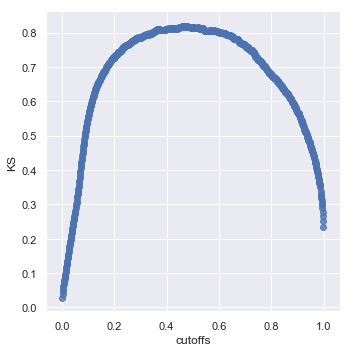

In [82]:
sns.lmplot(x='cutoffs',y='KS',data=temp,fit_reg=False)

In [83]:
cutoffs[KS==max(KS)][0]

0.467

In [84]:
test_hard_classes=(test_prediction>cutoffs[KS==max(KS)][0]).astype(int)

In [85]:
test_hard_classes[:,0]

array([1, 1, 1, ..., 1, 1, 1])

## writing to file

In [ ]:
output = pd.DataFrame({'REF_NO' : bd_test.REF_NO, 'Revenue.Grid':test_hard_classes[:,1]})
output.to_csv('submission.csv', index=False)

### Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
clf = RandomForestClassifier()

param_dist = {"n_estimators":[100,200,300,500,700,1000],
"max_features": [5,10,20,25,30,35],
"bootstrap": [True, False],
"class_weight":[None,'balanced'],
"criterion":['entropy','gini'],
"max_depth":[None,5,10,15,20,30,50,70],
"min_samples_leaf":[1,2,5,10,15,20],
"min_samples_split":[2,5,10,15,20]}

In [50]:
from sklearn.model_selection import RandomizedSearchCV

In [51]:
n_iter_search = 10
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                  n_iter=n_iter_search, scoring='roc_auc',
                                  cv = 5, verbose = 20)
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=500, min_samples_split=15, min_samples_leaf=20, max_features=30, max_depth=None, criterion=gini, class_weight=balanced, bootstrap=False 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=500, min_samples_split=15, min_samples_leaf=20, max_features=30, max_depth=None, criterion=gini, class_weight=balanced, bootstrap=False, score=0.9836216876384917, total=  21.5s
[CV] n_estimators=500, min_samples_split=15, min_samples_leaf=20, max_features=30, max_depth=None, criterion=gini, class_weight=balanced, bootstrap=False 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   22.2s remaining:    0.0s


[CV]  n_estimators=500, min_samples_split=15, min_samples_leaf=20, max_features=30, max_depth=None, criterion=gini, class_weight=balanced, bootstrap=False, score=0.9831605598815267, total=  21.4s
[CV] n_estimators=500, min_samples_split=15, min_samples_leaf=20, max_features=30, max_depth=None, criterion=gini, class_weight=balanced, bootstrap=False 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   44.2s remaining:    0.0s


[CV]  n_estimators=500, min_samples_split=15, min_samples_leaf=20, max_features=30, max_depth=None, criterion=gini, class_weight=balanced, bootstrap=False, score=0.9866916670647623, total=  21.9s
[CV] n_estimators=500, min_samples_split=15, min_samples_leaf=20, max_features=30, max_depth=None, criterion=gini, class_weight=balanced, bootstrap=False 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.1min remaining:    0.0s


[CV]  n_estimators=500, min_samples_split=15, min_samples_leaf=20, max_features=30, max_depth=None, criterion=gini, class_weight=balanced, bootstrap=False, score=0.9821377090140303, total=  21.5s
[CV] n_estimators=500, min_samples_split=15, min_samples_leaf=20, max_features=30, max_depth=None, criterion=gini, class_weight=balanced, bootstrap=False 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.5min remaining:    0.0s


[CV]  n_estimators=500, min_samples_split=15, min_samples_leaf=20, max_features=30, max_depth=None, criterion=gini, class_weight=balanced, bootstrap=False, score=0.9799875072073805, total=  20.9s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_features=10, max_depth=None, criterion=gini, class_weight=balanced, bootstrap=False 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.8min remaining:    0.0s


[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_features=10, max_depth=None, criterion=gini, class_weight=balanced, bootstrap=False, score=0.9859290525084637, total=   6.0s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_features=10, max_depth=None, criterion=gini, class_weight=balanced, bootstrap=False 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  2.0min remaining:    0.0s


[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_features=10, max_depth=None, criterion=gini, class_weight=balanced, bootstrap=False, score=0.9853062946862211, total=   6.1s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_features=10, max_depth=None, criterion=gini, class_weight=balanced, bootstrap=False 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  2.1min remaining:    0.0s


[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_features=10, max_depth=None, criterion=gini, class_weight=balanced, bootstrap=False, score=0.9882203538272902, total=   6.1s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_features=10, max_depth=None, criterion=gini, class_weight=balanced, bootstrap=False 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  2.2min remaining:    0.0s


[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_features=10, max_depth=None, criterion=gini, class_weight=balanced, bootstrap=False, score=0.985413062976488, total=   6.2s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_features=10, max_depth=None, criterion=gini, class_weight=balanced, bootstrap=False 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.3min remaining:    0.0s


[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_features=10, max_depth=None, criterion=gini, class_weight=balanced, bootstrap=False, score=0.9821737459158179, total=   6.0s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=20, max_features=10, max_depth=None, criterion=entropy, class_weight=balanced, bootstrap=True 


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.4min remaining:    0.0s


[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=20, max_features=10, max_depth=None, criterion=entropy, class_weight=balanced, bootstrap=True, score=0.9782351841316949, total=   8.2s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=20, max_features=10, max_depth=None, criterion=entropy, class_weight=balanced, bootstrap=True 


[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:  2.5min remaining:    0.0s


[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=20, max_features=10, max_depth=None, criterion=entropy, class_weight=balanced, bootstrap=True, score=0.9808595678275132, total=   8.2s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=20, max_features=10, max_depth=None, criterion=entropy, class_weight=balanced, bootstrap=True 


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  2.7min remaining:    0.0s


[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=20, max_features=10, max_depth=None, criterion=entropy, class_weight=balanced, bootstrap=True, score=0.982264844981608, total=   8.3s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=20, max_features=10, max_depth=None, criterion=entropy, class_weight=balanced, bootstrap=True 


[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:  2.8min remaining:    0.0s


[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=20, max_features=10, max_depth=None, criterion=entropy, class_weight=balanced, bootstrap=True, score=0.9806802165417388, total=   8.2s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=20, max_features=10, max_depth=None, criterion=entropy, class_weight=balanced, bootstrap=True 


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:  3.0min remaining:    0.0s


[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=20, max_features=10, max_depth=None, criterion=entropy, class_weight=balanced, bootstrap=True, score=0.9763758088282402, total=   8.3s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=15, max_features=25, max_depth=15, criterion=gini, class_weight=None, bootstrap=True 


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  3.1min remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=15, max_features=25, max_depth=15, criterion=gini, class_weight=None, bootstrap=True, score=0.9818911639860126, total=   5.4s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=15, max_features=25, max_depth=15, criterion=gini, class_weight=None, bootstrap=True 


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:  3.2min remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=15, max_features=25, max_depth=15, criterion=gini, class_weight=None, bootstrap=True, score=0.9823524259940445, total=   5.7s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=15, max_features=25, max_depth=15, criterion=gini, class_weight=None, bootstrap=True 


[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:  3.3min remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=15, max_features=25, max_depth=15, criterion=gini, class_weight=None, bootstrap=True, score=0.9827345976846765, total=   5.5s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=15, max_features=25, max_depth=15, criterion=gini, class_weight=None, bootstrap=True 


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  3.4min remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=15, max_features=25, max_depth=15, criterion=gini, class_weight=None, bootstrap=True, score=0.9803598885258505, total=   5.4s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=15, max_features=25, max_depth=15, criterion=gini, class_weight=None, bootstrap=True 


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:  3.5min remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=15, max_features=25, max_depth=15, criterion=gini, class_weight=None, bootstrap=True, score=0.9795510602857326, total=   5.4s
[CV] n_estimators=200, min_samples_split=15, min_samples_leaf=15, max_features=25, max_depth=70, criterion=gini, class_weight=balanced, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=15, max_features=25, max_depth=70, criterion=gini, class_weight=balanced, bootstrap=False, score=0.9845008732182569, total=   7.4s
[CV] n_estimators=200, min_samples_split=15, min_samples_leaf=15, max_features=25, max_depth=70, criterion=gini, class_weight=balanced, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=15, max_features=25, max_depth=70, criterion=gini, class_weight=balanced, bootstrap=False, score=0.9836263316294845, total=   7.5s
[CV] n_estimators=200, min_samples_split=15, min_samples_leaf=15, max_features=25, max_depth=70, criterion=gini, class

[CV]  n_estimators=500, min_samples_split=15, min_samples_leaf=2, max_features=35, max_depth=15, criterion=entropy, class_weight=balanced, bootstrap=True, score=0.9851848292651675, total=  24.1s
[CV] n_estimators=500, min_samples_split=15, min_samples_leaf=2, max_features=35, max_depth=15, criterion=entropy, class_weight=balanced, bootstrap=True 
[CV]  n_estimators=500, min_samples_split=15, min_samples_leaf=2, max_features=35, max_depth=15, criterion=entropy, class_weight=balanced, bootstrap=True, score=0.9846482798385547, total=  23.4s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=15, max_features=10, max_depth=10, criterion=gini, class_weight=balanced, bootstrap=True 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=15, max_features=10, max_depth=10, criterion=gini, class_weight=balanced, bootstrap=True, score=0.9770775234814159, total=   1.1s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=15, max_features=10, max_depth=10, criterion=gini

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  9.5min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': [100, 200, 300, 500, 700, 1000], 'max_features': [5, 10, 20, 25, 30, 35], 'bootstrap': [True, False], 'class_weight': [None, 'balanced'], 'criterion': ['entropy', 'gini'], 'max_depth': [None, 5, 10, 15, 20, 30, 50, 70], 'min_samples_leaf': [1, 2, 5, 10, 15, 20], 'min_samples_split': [2, 5, 10, 15, 20]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          re

In [53]:
y_preds = random_search.predict(x_train)

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_preds)

0.9981536189069424

In [72]:
y_preds = random_search.predict(test1)

## <a id='5'>5. Writing Hard classes to output file</a> 

In [87]:
output = pd.DataFrame({'REF_NO' : bd_test.REF_NO, 'Revenue.Grid':y_preds})
output.to_csv('submission1.csv', index=False)

## XGBoost Model


In [88]:
from xgboost.sklearn import XGBClassifier

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] ==i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.5f} (std: {1:.5f})".format(
                results['mean_test_score'][candidate],
                results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [97]:
xgb_params = {
"n_estimators":[500,700, 100]
}
xgb1=XGBClassifier(subsample=0.8,colsample_bylevel=0.8,colsample_bytree=0.8)
grid_search=GridSearchCV(xgb1,cv=5,param_grid=xgb_params,
                scoring='roc_auc',verbose=False)

In [98]:
grid_search.fit(x_train,y_train)
report(grid_search.cv_results_,3)

Model with rank: 1
Mean validation score: 0.98894 (std: 0.00197)
Parameters: {'n_estimators': 700}

Model with rank: 2
Mean validation score: 0.98852 (std: 0.00176)
Parameters: {'n_estimators': 500}

Model with rank: 3
Mean validation score: 0.98178 (std: 0.00254)
Parameters: {'n_estimators': 100}



In [103]:
xgb_params={
        "gamma":[0,2,5,8],
        "max_depth": [2,3,4,5],
        "min_child_weight":[0.5,1,2,]
    }

In [104]:
xgb2=XGBClassifier(n_estimators=700,subsample=0.8,
            colsample_bylevel=0.8,colsample_bytree=0.8)

In [105]:
random_search=RandomizedSearchCV(xgb2,param_distributions=xgb_params,n_iter=20,
                cv=5,scoring='roc_auc',
                verbose=False)

In [106]:
random_search.fit(x_train,y_train)
report(random_search.cv_results_,3)

Model with rank: 1
Mean validation score: 0.99062 (std: 0.00127)
Parameters: {'min_child_weight': 0.5, 'max_depth': 5, 'gamma': 0}

Model with rank: 2
Mean validation score: 0.99033 (std: 0.00167)
Parameters: {'min_child_weight': 1, 'max_depth': 5, 'gamma': 0}

Model with rank: 3
Mean validation score: 0.98968 (std: 0.00116)
Parameters: {'min_child_weight': 2, 'max_depth': 5, 'gamma': 0}



In [108]:
y_pred = random_search.predict(test1)

In [109]:
xgb_params={
        'max_delta_step':[0,1,3,6,10],
        'scale_pos_weight':[1,2,3,4]
    }

In [110]:
xgb3=XGBClassifier(n_estimators=700,min_child_weight=0.5,gamma=0,max_depth=5,
                subsample=0.8,colsample_bylevel=0.8,colsample_bytree=0.8)

In [111]:
grid_search=GridSearchCV(xgb3,param_grid=xgb_params,
            cv=5,scoring='roc_auc',verbose=False)

In [112]:
grid_search.fit(x_train,y_train)
report(grid_search.cv_results_,3)

Model with rank: 1
Mean validation score: 0.99065 (std: 0.00145)
Parameters: {'max_delta_step': 3, 'scale_pos_weight': 4}

Model with rank: 2
Mean validation score: 0.99062 (std: 0.00127)
Parameters: {'max_delta_step': 0, 'scale_pos_weight': 1}

Model with rank: 2
Mean validation score: 0.99062 (std: 0.00127)
Parameters: {'max_delta_step': 6, 'scale_pos_weight': 1}

Model with rank: 2
Mean validation score: 0.99062 (std: 0.00127)
Parameters: {'max_delta_step': 10, 'scale_pos_weight': 1}



In [115]:
y_preds = grid_search.predict(x_train)

In [116]:
accuracy_score(y_preds, y_train)

1.0

In [117]:
y_preds = grid_search.predict(test1)